<a href="https://colab.research.google.com/github/widihartatiratu/E-Commerce-Sales-Analytics/blob/main/e_commerce_sales_analytics_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-Commerce Sales Analytics using Python**

Superstore product are group into furniture, Office Supplies and Technology while its customer are either consumer, corporate or home office. The aims of this project is to provide an in depth analysis of this data and to answer the following questions:



1.   What sub-categories generate the most/least revenue and profit?
2.   What products are the most/least profitable?
3.   What states generate the most sales and profit?
4.   what are our customer purchasing habits?



# 1) Import Libraries

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset ke superstore
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset ke superstore
superstore = pd.read_csv('/content/drive/MyDrive/Sample - Superstore.csv', encoding='cp1252')

In [ ]:
#preview 5 dataset
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 2) Data Cleaning

In [ ]:
#drop unwanted columns
superstore.drop('Row ID',axis=1, inplace=True)

In [ ]:
#Confirm drop column
superstore.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# shape of dataframe
superstore.shape


(9994, 20)

# 3) Exploratory Data Analysis

In [ ]:
#get data summary
superstore.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [ ]:
#check for null values
superstore.isnull().sum()


Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
# find NAN
nan_df = superstore[superstore.isna().any(axis=1)]

In [ ]:
display(nan_df.head())

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [ ]:
# check for duplicatee values and remove them
superstore.duplicated().sum()


1

In [ ]:
# show the duplicated rows
superstore[superstore.duplicated(keep = 'last')]


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [ ]:
#drop the duplicated rows
superstore.drop_duplicates(inplace=True)


In [ ]:
#find the number of rows and columns
superstore.shape


(9993, 20)

In [ ]:
#create new column for profit margin
superstore['Profit Margin']=(superstore.Profit/superstore.Sales)*100


In [ ]:
#confirm new columns has been added
superstore.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Profit Margin'],
      dtype='object')

In [ ]:
#get ddescriptive statistic summary
superstore.describe(include = "all")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
count,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,...,9993,9993,9993,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
unique,5009,1237,1334,4,793,793,3,1,531,49,...,4,1862,3,17,1850,NaN,NaN,NaN,NaN,NaN
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,...,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN,NaN
freq,14,38,35,5967,37,37,5191,9993,915,2001,...,3203,19,6026,1523,48,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,229.852846,3.789753,0.156188,28.660971,12.033026
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,623.276074,2.225149,0.206457,234.271476,46.677485
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.731000,7.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,54.480000,3.000000,0.200000,8.671000,27.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000,36.250000


**What Categories generate the most/least revenue and profit?**

In [ ]:
cat_analysis=pd.DataFrame(superstore.groupby(['Category'])[['Sales','Profit','Quantity']].sum())
cat_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741718.4233,18463.3316,8026
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145454.9481,6939


<function matplotlib.pyplot.show(*args, **kw)>

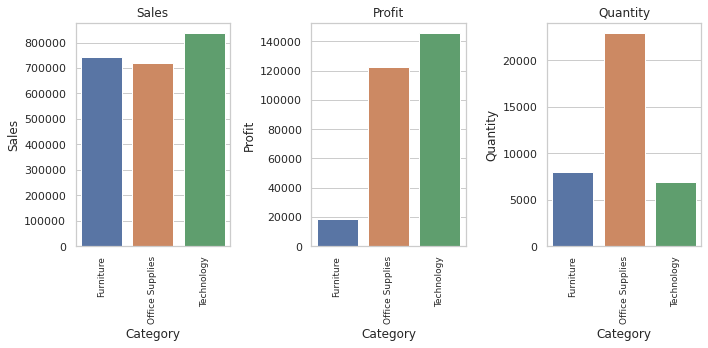

In [ ]:
#set for grouped plots - figure with a 2x2 grid of axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(10, 5))
#plot barplot
cat1 = sns.barplot(x = cat_analysis.index, y = cat_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = cat_analysis.index, y = cat_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = cat_analysis.index, y = cat_analysis.Quantity, ax=axis[2])
#set title
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
#Rotate axis for X-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

#set spacing between subplots
figure.tight_layout()
plt.show

**What Sub-Categories generate the most/least revenue and profit?**

In [ ]:
sub_analysis=pd.DataFrame(superstore.groupby(['Sub-Category'])[['Sales','Profit','Quantity']].sum())
sub_analysis

,Sales,Profit,Quantity
Sub-Category,,,
Accessories,167380.3180,41936.6357,2976
Appliances,107532.1610,18138.0054,1729
Art,27118.7920,6527.7870,3000
Binders,203412.7330,30221.7633,5974
Bookcases,114879.9963,-3472.5560,868
Chairs,328167.7310,26602.2251,2354
Copiers,149528.0300,55617.8249,234
Envelopes,16476.4020,6964.1767,906
Fasteners,3024.2800,949.5182,914


In [ ]:
#Group by Sub-Category
subcat_analysis=pd.DataFrame(superstore.groupby(['Sub-Category'])[['Sales','Profit','Quantity']].sum())
#sort by descending order according to sales
subcat_sales=pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
#sort by descending order according to profit
subcat_profit=pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
#sort by descending order according to Quantity
subcat_Quantity=pd.DataFrame(subcat_analysis.sort_values('Quantity', ascending = False))

<function matplotlib.pyplot.show(*args, **kw)>

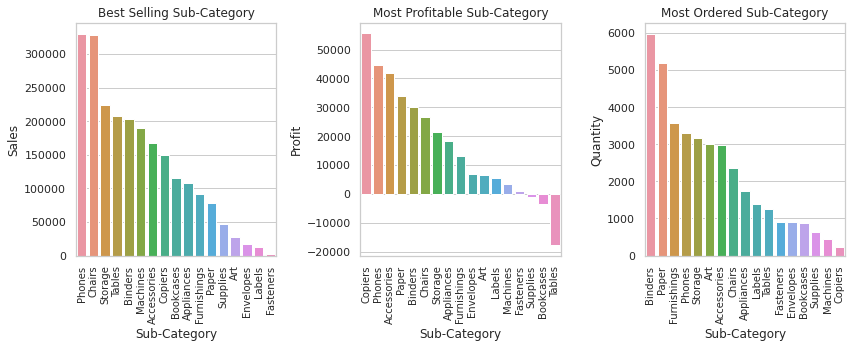

In [ ]:
#Group subcategory by saless, profit and quantity
subcat_analysis=pd.DataFrame(superstore.groupby(['Sub-Category'])[['Sales','Profit','Quantity']].sum())
#plot bar plots
sns.set_theme(style="whitegrid")
#set for grouped plots - figure with a 1x2 grid of axes
figure, axis = plt.subplots(1, 3, figsize=(12,5))
# Plot bar plot for best selling sub-category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax = axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plot bar plot for Most Profitable sub-category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax = axis[1])
subcat2.set(title="Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Plot bar plot for Most Ordered sub-category
subcat3 = sns.barplot(data = subcat_Quantity, x = subcat_Quantity.index, y = subcat_Quantity.Quantity, ax = axis[2])
subcat3.set(title="Most Ordered Sub-Category")
subcat3.set_xticklabels(subcat3.get_xticklabels(),rotation = "vertical", size = 10)

#set spacing between subplots
figure.tight_layout()
plt.show

**What products are the most/least profitable?**

In [ ]:
#Group product name by profit
product_analysis = pd.DataFrame(superstore.groupby(['Product Name'])[['Profit', 'Sales', 'Quantity']].sum())
#sort by descending order according to sales
product_sales = pd.DataFrame(product_analysis.sort_values('Sales', ascending = False))
#sort by descending order according to profit
product_profit = pd.DataFrame(product_analysis.sort_values('Profit', ascending = False))
#sort by descending order according to purchase quantity
product_quantity = pd.DataFrame(product_analysis.sort_values('Quantity', ascending = False))

#get top 5 products by profit
#compare against their perspecive sales and quantity
product_profit.head()

,Profit,Sales,Quantity
Product Name,,,
Canon imageCLASS 2200 Advanced Copier,25199.9280,61599.824,20
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390,27453.384,31
Hewlett Packard LaserJet 3310 Copier,6983.8836,18839.686,38
Canon PC1060 Personal Laser Copier,4570.9347,11619.834,19
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766,18374.895,12


In [ ]:
#get bottom 5 product by profit
#compare against their perspecive sales and quantity
product_profit.tail()

,Profit,Sales,Quantity
Product Name,,,
Bush Advantage Collection Racetrack Conference Table,-1934.3976,9544.725,33
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156,9917.640,27
Cubify CubeX 3D Printer Triple Head Print,-3839.9904,7999.980,4
Lexmark MX611dhe Monochrome Laser Printer,-4589.9730,16829.901,18
Cubify CubeX 3D Printer Double Head Print,-8879.9704,11099.963,9


**What statess generate the most/leasst sales**

In [ ]:
#Group states by sales, profit and quantity
state_group = pd.DataFrame(superstore.groupby(['State'])[['Sales', 'Profit', 'Quantity']].sum())
#Sort by sales in descending order
state_sales = pd.DataFrame(state_group.sort_values('Sales',ascending=False))
#Get top 5 states by sales and compare against perspective profit and quantity
state_sales.head()

,Sales,Profit,Quantity
State,,,
California,457687.6315,76381.3871,7667
New York,310876.2710,74038.5486,4224
Texas,170188.0458,-25729.3563,3724
Washington,138641.2700,33402.6517,1883
Pennsylvania,116511.9140,-15559.9603,2153


In [ ]:
#Get bottom states by sales and compare against their perspective profit and quantity
state_sales.tail()

,Sales,Profit,Quantity
State,,,
Wyoming,1603.136,100.1960,4
South Dakota,1315.560,394.8283,42
Maine,1270.530,454.4862,35
West Virginia,1209.824,185.9216,18
North Dakota,919.910,230.1497,30


In [ ]:
superstore2 = pd.read_csv('/content/drive/MyDrive/Sample - Superstore.csv', encoding='cp1252')